In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

#python'da uyarıları kapatalım
import warnings
warnings.filterwarnings("ignore")

#veriyi içeri aktaracağız
veri=pd.read_csv("olimpiyatlar_temizlenmis.csv")

In [3]:
erkek=veri[veri.cinsiyet=="M"]
print(erkek.head(2))

                   isim cinsiyet   yas     boy   kilo           takim  uok  \
0  Edgar Lindenau Aabye        M  34.0  182.48  95.62  Denmark/Sweden  DEN   
1  Arvo Ossian Aaltonen        M  30.0  182.01  76.69         Finland  FIN   

    yil   sezon      sehir        spor  \
0  1900  Summer      Paris  Tug-Of-War   
1  1920  Summer  Antwerpen    Swimming   

                                 etkinlik madalya  
0             Tug-Of-War Men's Tug-Of-War    Gold  
1  Swimming Men's 200 metres Breaststroke  Bronze  


In [4]:
kadin=veri[veri.cinsiyet=="F"]
print(kadin.head(1))

                         isim cinsiyet   yas    boy   kilo   takim  uok   yil  \
17  Ragnhild Margrethe Aamodt        F  27.0  163.0  68.88  Norway  NOR  2008   

     sezon    sehir      spor                   etkinlik madalya  
17  Summer  Beijing  Handball  Handball Women's Handball    Gold  


Kadın ve erkekler arasında boy ilişkisine bakalım

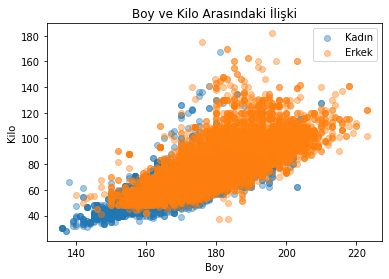

In [5]:
plt.figure()
plt.scatter(kadin.boy,kadin.kilo,alpha=0.4,label="Kadın")
plt.scatter(erkek.boy,erkek.kilo,alpha=0.4,label="Erkek")
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.title("Boy ve Kilo Arasındaki İlişki")
plt.legend()
plt.show()

In [6]:
print(veri.loc[:,["yas","boy","kilo"]].corr())

           yas       boy      kilo
yas   1.000000  0.061890  0.136349
boy   0.061890  1.000000  0.794368
kilo  0.136349  0.794368  1.000000


madalya ve yaş arasındaki ilişki

In [8]:
veri_gecici=veri.copy()
veri_gecici=pd.get_dummies(veri_gecici,columns=["madalya"])
print(veri_gecici.head(2))

                   isim cinsiyet   yas     boy   kilo           takim  uok  \
0  Edgar Lindenau Aabye        M  34.0  182.48  95.62  Denmark/Sweden  DEN   
1  Arvo Ossian Aaltonen        M  30.0  182.01  76.69         Finland  FIN   

    yil   sezon      sehir        spor  \
0  1900  Summer      Paris  Tug-Of-War   
1  1920  Summer  Antwerpen    Swimming   

                                 etkinlik  madalya_Bronze  madalya_Gold  \
0             Tug-Of-War Men's Tug-Of-War               0             1   
1  Swimming Men's 200 metres Breaststroke               1             0   

   madalya_Silver  
0               0  
1               0  


In [9]:
veri_gecici.loc[:,["yas","madalya_Bronze","madalya_Gold","madalya_Silver"]].corr()

,yas,madalya_Bronze,madalya_Gold,madalya_Silver
yas,1.000000,-0.005584,-0.002576,0.008192
madalya_Bronze,-0.005584,1.000000,-0.504110,-0.496859
madalya_Gold,-0.002576,-0.504110,1.000000,-0.499022
madalya_Silver,0.008192,-0.496859,-0.499022,1.000000


Takımların kazandıkları altın, gümüş ve bronz madalya sayıları

In [11]:
veri_gecici[["takim","madalya_Gold","madalya_Silver","madalya_Bronze"]].groupby(["takim"],as_index=False).sum().sort_values(by="madalya_Gold",ascending=False)[:10]

,takim,madalya_Gold,madalya_Silver,madalya_Bronze
462,United States,2474.0,1512.0,1233.0
403,Soviet Union,1058.0,716.0,677.0
165,Germany,679.0,627.0,678.0
215,Italy,535.0,508.0,484.0
171,Great Britain,519.0,582.0,572.0
149,France,455.0,518.0,577.0
420,Sweden,451.0,476.0,507.0
198,Hungary,432.0,330.0,365.0
67,Canada,422.0,413.0,408.0
117,East Germany,369.0,309.0,263.0


Kazanılan madalyaların hangi şehirlerde kazanıldığı

In [12]:
veri_gecici[["sehir","madalya_Gold","madalya_Silver","madalya_Bronze"]].groupby(["sehir"],as_index=False).sum().sort_values(by="madalya_Gold",ascending=False)[:10]

,sehir,madalya_Gold,madalya_Silver,madalya_Bronze
17,London,1215.0,1195.0,1214.0
3,Athina,883.0,859.0,860.0
18,Los Angeles,726.0,691.0,706.0
6,Beijing,671.0,667.0,710.0
27,Rio de Janeiro,665.0,655.0,703.0
38,Sydney,663.0,661.0,680.0
4,Atlanta,608.0,605.0,629.0
5,Barcelona,559.0,549.0,604.0
33,Seoul,520.0,513.0,549.0
2,Antwerpen,493.0,448.0,367.0


Cinsiyete göre kazanılmış altın, gümüş ve bronz madalya sayıları

In [13]:
veri_gecici[["cinsiyet","madalya_Gold","madalya_Silver","madalya_Bronze"]].groupby(["cinsiyet"],as_index=False).sum().sort_values(by="madalya_Gold",ascending=False)[:10]

,cinsiyet,madalya_Gold,madalya_Silver,madalya_Bronze
1,M,9625.0,9381.0,9524.0
0,F,3747.0,3735.0,3771.0
